# Fundamentals

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lukeconibear/intro_ml/blob/main/docs/01_fundamentals.ipynb)

In [ ]:
# if you're using colab, then install the required modules
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    %pip install ...

## Basic ideas

### Overview

Machine learning is a subset of Artificial Intelligence.

It is a range of methods that learn associations from data.

It then uses these associations for new predictions.

These can be useful for:

- Prediction problems (e.g., pattern recognition).
- Problems cannot program (e.g., image recognition).
- Faster approximations to problems that can program (e.g., spam classification).

### Methods

Within machine learning, there are many different methods.

Some main methods are:

- Classic
- Deep learning (neural networks)
- Reinforcement learning
- Ensembles (e.g., multiple decision trees)

We'll focus on _classic machine learning_ and _deep learning_ in this course.

### Classic Machine Learning

...


Simple data, clear features.

There are a wide variety of types. Some common ones are:

- Linear models
    - ...
- Nearest neighbours
    - Points are similar to their neighbours.
- Decision trees
    - Split the data by a decision (i.e., a branch of leaves).
    - Combine multiple decisions (i.e., a tree). 
- Support vector machines
    - ...
- And many more.

### Deep Learning

Deep means more layers.



Neural networks (NN) 

Useful for non-linear, with large number of features 

Compilcated data, unclear features.



There are a wide variety of types. Some common ones are:

- Convolutional NN
    - ...
- Recurrent NN
    - ...
- Transformers
    - ...
- Sequence
    - ...
- GANs (Generative Adverserial Networks)
    - ...
- And many more.

...

Steps 

Inputs 

forward propagate 

predict outputs 

compute loss 

backward propagate 

gradient descent 

update weights and biases 


Scale is driving DL progress 

Bigger training data (Larger data sets (labelled, m)) 

Bigger neural networks 

Now investment and attention drive it forward more 



### Data

The data is a sample of the problem you're studying.

Data has inputs (features) and outputs (targets).

- The inputs are what you provide to the model.
- The outputs are what you're trying to predict.

The data is normally in the form of tensors.

Tensors are multi-dimensional arrays:

- Scalars are rank-0 tensors.
- Vectors are rank-1 tensors.
- Matrices are rank-2 tensors.
- 3+ dimensional arrays are rank-3+ tensors.

![tensors.png](images/tensors.png)  

*[Image source](https://medium.com/mlait/tensors-representation-of-data-in-neural-networks-bbe8a711b93b)*

### Supervised and unsupervised

- Supervised learning is when you provide labelled outputs to learn from.
- Unsupervised learning when you don't provide any labels.

Below is an example of supervised learning (classify different coloured markers) and unsupervised learning (find clusters within similar data).

![supervised_vs_unsupervised.png](images/supervised_vs_unsupervised.png)  

*[Image source](https://analystprep.com/study-notes/cfa-level-2/quantitative-method/supervised-machine-learning-unsupervised-machine-learning-deep-learning/)*

We'll focus on supervised learning in this course.

### Classification and regression

- Classification problems are those that try to predict a discrete category (i.e., cat or dog).
- Regression problems are those that try to predict a continuous number (i.e., beans in a jar).

Below is an example of classification (separate blue circles from purple crosses) and regression (predict a numerical value from the data).

![classification_vs_regression.png](images/classification_vs_regression.png)  

*[Image source](https://towardsdatascience.com/supervised-vs-unsupervised-learning-14f68e32ea8d)*

### Training, validation, and test splits

The data is normally split into training, validation, and test sets.

- The training set is for training the model.
- The validation set (optional) is for iteratively optimising the model during training.
- The test set is only for testing the model at the end.
    - This should remain untouched and _single-use_ (to ensure representative of future data).

![train-val-test-split.png](images/train-val-test-split.png)  

*[Image source](https://stackoverflow.com/a/56100053/6250873)*

The size of the split depends on the size of the dataset and the signal you're trying to predict (i.e., the smaller the signal, then the larger the test set needs to be).

- For small data sets, a split of 60/20/20 for train/validation/test may be suitable.
- For medium data sets, a split of 80/10/10 for train/validation/test may be suitable.
- For large data sets, a split of 90/5/5 for train/validation/test may be suitable.
- For very large data sets, a split of 98/1/1 for train/validation/test may be suitable.

The split may benefit from being stratified to ensure each set has a sample of the classes.

### Cross-validation

To estimate the _variability_ in the training score, then you can use cross-validation.

This repeats the _training/validation_ split multiple times (_the test data remains untouched_).

There are various methods for cross-validation.

These are mainly variations of K-fold cross-validation, where you split the data up k times (e.g., 5).

Variations then consider stratifying (preserving original class frequencies), shuffling, sampling, and replacing.

Below is an example for 5-fold cross-validation (i.e., splitting 5 times).

![cross_validation.png](images/cross_validation_diagram.png)  

*[Image source](https://inria.github.io/scikit-learn-mooc/python_scripts/02_numerical_pipeline_cross_validation.html)*

### Hyperparameters

These are what _you set before_ model training (i.e., the architecture).

They control the learning process.

They are often found through iterative trying out different options.

This iterative tuning method can be:

- Systematically over a grid (i.e., grid-search)
    - Thorough, slow, not suitable for problems with many variables
- Randomly over a grid (i.e., random grid-search)
    - Faster and more suitable for problems with many variables
- Other options including:
    - Using Bayes Theorem (i.e., Bayes grid-search) to choose a new set of hyperparameters to test based on the performance of prior set.

### Parameters

These are what the model learns _during training_ (i.e., the weights / biases / coefficients of the model).


Best set of parameters (i.e., global optimimum)
local optimum

...

### Training

- Cost function (average of loss functions over whole training set) 
- Loss function (error on single training example) 
    - always want to minimise
    - .e.g, mean squared error
- gradient descent


### Evaluation

The goal of machine learning is predicting new data.

Hence, the objective is to minimise the _test error_ (as this represents new data).

...

- error analysis (e.g., Confusion Matrix)

...

R2 (coefficient of determination) 
Any value less than 1, as model can be continually awful 
1 is perfect 
0 is not more information than just predicting the mean 

Evaluation metric

- One singular evaluation metric to help guide decisions

Classification

- Class imbalance

Regression

- 


### Underfit

A model _underfits_ the data when it has _high bias_ (i.e., systematic errors). 

This means the model is _too simple_ to capture the association.

You can tell that the model underfits because there are _both_ high training errors and high test errors.

To reduce underfitting, try:

- Adding more features.
- Adding more complex features.
- Decreasing regularisation (i.e., decrease preference for simpler functions).

More training data is unlikely to help a model that underfits the data.

### Overfit

A model _overfits_ the data when it has _high variance_ (i.e., varies a lot). 

This means the model is _too complex_ to capture the association.

You can tell that the model overfits because there are _low_ training errors _but_ high test errors (i.e., there is a big difference between these errors, where the model doesn't work well on new data because it overfitted to the noise in the training data).

To reduce overfitting, try:

- Adding more data.
- Using fewer or simpler features.
- Increasing regularisation (i.e., increase preference for simpler functions).
- A smaller neural network with fewer layers/parameters.

Below is an example of underfitting (linear line through non-linear data) and overfitting (very-high order polynomial passing through every training point).

![underfit_vs_overfit.png](images/underfit_vs_overfit.png)  

*[Image source](https://www.educative.io/edpresso/overfitting-and-underfitting)*

## Tools

There is huge variety of machine learning and deep learning tools.

In this course, we'll focus on scikit-learn and TensorFlow.

### [scikit-learn](https://scikit-learn.org/stable/)

Scikit-learn has a wide range of simple and efficient machine learning tools.  

There are ones for:

- [Linear models](https://scikit-learn.org/stable/modules/linear_model.html) ([examples](https://scikit-learn.org/stable/auto_examples/index.html#generalized-linear-models))
- [Nearest neighbours](https://scikit-learn.org/stable/modules/neighbors.html) ([examples](https://scikit-learn.org/stable/auto_examples/index.html#nearest-neighbors))
- [Support vector machines](https://scikit-learn.org/stable/modules/svm.html) ([examples](https://scikit-learn.org/stable/auto_examples/index.html#support-vector-machines))
- [Decision trees](https://scikit-learn.org/stable/modules/tree.html) ([examples](https://scikit-learn.org/stable/auto_examples/index.html#decision-trees))
- And [many more](https://scikit-learn.org/stable/index.html#).

### [TensorFlow](https://www.tensorflow.org/)

Tensorflow is an end-to-end open source machine learning platform.

The [documentation](https://www.tensorflow.org/guide) has a wide range of useful [tutorials](https://www.tensorflow.org/tutorials).

TensorFlow has use-friendly higher-level APIs (Application Programming Interface)

- [Keras](https://keras.io/).
- [Sonnet](https://sonnet.readthedocs.io/en/latest/)

...

- [Callbacks]()
    - ...
- [Keras Tuner](https://keras.io/keras_tuner/)
    - For hyperparameter optimisation.

You can always go to the lower-level API if you want or need to.

- [Automatic differention](https://www.tensorflow.org/guide/autodiff) with `tf.GradientTape()`  
- ...

There are many [libraries and extensions](https://www.tensorflow.org/resources/libraries-extensions) including:

- [TensorFlow Extended](https://www.tensorflow.org/tfx) for deployment.
- [TensorFlow Lite](https://www.tensorflow.org/lite/guide) for mobile and IoT (internet of things) devices.
- [TensorFlow Probability](https://www.tensorflow.org/probability) for probabilistic reasoning.

A model contains multiple layers of input-output transformations.

It can be built using either the [Sequential](https://keras.io/guides/sequential_model/) or [Functional](https://keras.io/guides/functional_api/) API (application programming interface).

| Sequential | Functional |
| --- | --- |
| Linear stack of layers. | Non-linear DAG (directed acyclic graph) of layers. |
| Each layer has one input and one output. | Each layer can have multiple inputs and outputs. |

### [PyTorch](https://pytorch.org/)

PyTorch is an end-to-end open source machine learning platform.

The [documentation](https://pytorch.org/docs/stable/index.html) has a wide range of useful [tutorials](https://pytorch.org/tutorials/).

PyTorch has use-friendly higher-level APIs:

- ...

- [fastai](https://docs.fast.ai/)
    - A high-level API for PyTorch.
- [PyTorch Lightning](https://pytorch-lightning.readthedocs.io/en/latest/)
    - Helps write boilerplate code, scale out to multiple devices, and other helpful things.

You can always go to the lower-level API if you want or need to.

- ...


There are many [libraries and extensions](https://pytorch.org/ecosystem/) including:

- [TorchServe](https://pytorch.org/serve/) for deployment.
- [Pytorch Live](https://pytorch.org/live/) for mobile and IoT devices.
- [GPyTorch](https://gpytorch.ai/) for Gaussian Processes.

### [JAX](https://jax.readthedocs.io/en/latest/#)

JAX is library for GPU accelerated NumPy with automatic differentiation.

There are many tools built upon JAX, including:

- [Flax](https://github.com/google/flax)
    - A neural network library and ecosystem for JAX that is designed for flexibility.
- [Haiku](https://dm-haiku.readthedocs.io/en/latest/)
    - Built on top of JAX to provide simple, composable abstractions for machine learning research.

The [tool you choose depends on](https://www.assemblyai.com/blog/pytorch-vs-tensorflow-in-2022/):

- Your research problem
- Model availability (e.g., pre-trained, state-of-the-art)
- Deployment (e.g., hardware)
- Ecosystem (e.g., compatibility with other tools)
- Personal preferences

## Example - Linear regression

Let's start with a simple example fitting a straight line to data.

We'll see how this in done in each of three key tools we cover here: scikit-learn, TensorFlow, and PyTorch.

Let's create some (noisy) data to train on:

In [201]:
import numpy as np

In [2]:
def create_noisy_linear_data(num_points):
    x = np.arange(num_points)
    noise = np.random.normal(0, 1, num_points)
    y = 2 * x + noise
    # convert to 2D arrays
    x, y = x.reshape(-1, 1), y.reshape(-1, 1)
    return x, y

In [3]:
x_train, y_train = create_noisy_linear_data(10)

```{caution} 

Input arrays to models needs to be 2 dimensional (2D) i.e., a column of rows.

For example, instead of one row:

`>>> np.arange(10)`  
`array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])`  

Convert this to a column of rows using `.reshape(-1, 1)`:  

`>>> np.arange(10).reshape(-1, 1)`  
`array([[0],`  
`       [1],`  
`       [2],`  
`       [3],`  
`       [4],`  
`       [5],`  
`       [6],`  
`       [7],`  
`       [8],`  
`       [9]])`  

```

### scikit-learn

First, let's try with [scikit-learn](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html):

In [4]:
from sklearn import linear_model

In [5]:
model_sklearn = linear_model.LinearRegression()

When fit is called for Linear Regression, the _loss_ that is trying to be minimised is the _mean squared error_ between the predictions and the actual values.

This determines what parameters the model learns.

In [6]:
model_sklearn.fit(x_train, y_train)

LinearRegression()

The data was from the line `y = 2x`, so the gradient was 2.

Let's see what the model estimated it to be:

In [7]:
gradient = model_sklearn.coef_[0]
intercept = model_sklearn.intercept_

gradient

array([1.80977179])

Pretty close, considering there was only 10 training data points.

### TensorFlow

Now, for **TensorFlow**:

In [8]:
import tensorflow as tf

2022-03-11 17:08:50.421724: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-11 17:08:50.421741: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [9]:
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1]),
])

2022-03-11 17:08:51.386563: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-11 17:08:51.386585: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-11 17:08:51.386597: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (UOL-LAP-5G6CZH3): /proc/driver/nvidia/version does not exist
2022-03-11 17:08:51.386764: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model_tf.compile(
    optimizer="sgd",            # ...
    loss="mean_squared_error",  # what to minimise
    metrics=["accuracy"]        # ...
)

In [11]:
model_tf.fit(
    x_train, y_train,  # the training data
    epochs=500,        # how many runs through the training data
    verbose=False      # print out the metrics per epoch
);

And, let's see what this model though the gradient was:

In [25]:
model_tf.weights[0].numpy()

array([[1.8126204]], dtype=float32)

Now, we can see how well these models fit a line to the data:

In [26]:
y_pred_sklearn = model_sklearn.predict(x_train)

In [27]:
y_pred_tf = model_tf.predict(x_train)

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
params = {'font.size': 14, 'text.usetex': True}
matplotlib.rcParams.update(params)

In [33]:
colors = {
    'data': '#1b9e77',
    'sklearn': "#d95f02",
    'tf': "#7570b3"
}

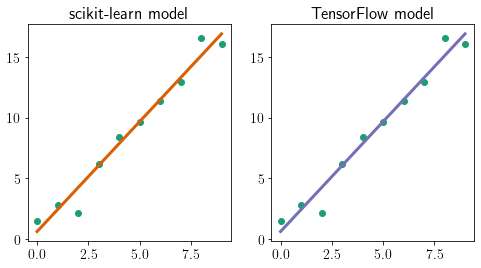

In [34]:
fig = plt.figure(1, figsize=(8, 4))
ax1, ax2 = fig.subplots(1, 2)

ax1.scatter(x_train, y_train, color=colors['data'])
ax1.plot(x_train, y_pred_sklearn, color=colors['sklearn'], linewidth=3)
ax1.set_title('scikit-learn model')

ax2.scatter(x_train, y_train, color=colors['data'])
ax2.plot(x_train, y_pred_tf, color=colors['tf'], linewidth=3)
ax2.set_title('TensorFlow model')

plt.show()

They both did a good job of fitting a function to the data.

In other words, they found the association in the data.

However, this was a very simple example that probably didn't require machine learning (let alone deep learning).

Though it demonstrates what they do.

Now, let's look at something a little more complicated.

## Example - Digit classification

Let's train a model to recognise digits.

This is a classification task.

### scikit-learn

First, with [scikit-learn](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html):

In [202]:
from sklearn import datasets, svm, metrics, linear_model
from sklearn.model_selection import train_test_split

Load the data:

In [203]:
digits = datasets.load_digits()

Take a look at the labelled data:

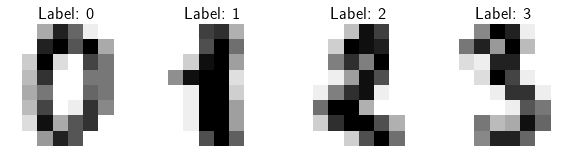

In [204]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")

Preprocess and split the data:

In [205]:
def preprocess_data(digits):
    # the data comes as 2D 8x8 pixels
    # flatten the images to 1D 64 pixels
    n_samples = len(digits.images)
    data = digits.images.reshape((n_samples, -1))
    return n_samples, data

In [206]:
n_samples, data = preprocess_data(digits)

In [207]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

Create a model.

Here, we will use a [Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) (a type of support vector machine).

In [208]:
model = linear_model.LogisticRegression()

In [215]:
model = svm.SVC(gamma=0.001)

Fit the model to the training data:

In [216]:
model.fit(X_train, y_train)

SVC(gamma=0.001)

Use the model to predict the test data:

In [217]:
y_pred = model.predict(X_test)

Take a look at the predictions for these test digits:

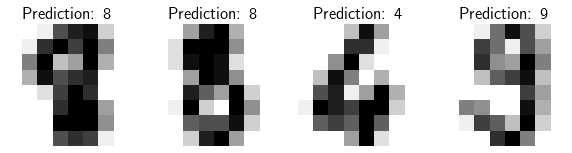

In [218]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)  # 1D 64 pixels to 2D 8*8 pixels for plotting
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction:.0f}")

How well did our model do overall?

In [219]:
overall_accuracy = metrics.accuracy_score(y_test, y_pred)
overall_accuracy

0.9688542825361512

97% accuracy is very good.

Let's do some quick error analysis using a [confusion matrix](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix).

This shows how well the classification model did for each category.

The predictions are on the x-axis and the true labels from the test data are on the y-axis.

A perfect score would be where the predictions always match the true labels (i.e., all values are on the diagonal line).

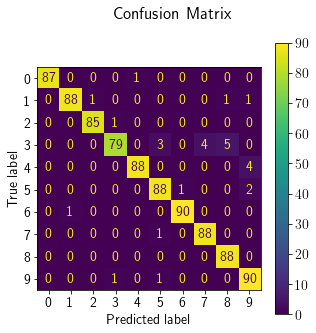

In [220]:
confusion_matrix = metrics.ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred
)
confusion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

We can see that the although the model did well, it struggled with 3's by confusing them with 5's, 7's, and 8's.

This points us in the direction of how we might improve the model.

In [246]:
from sklearn.model_selection import KFold, cross_val_score

In [247]:
cv = KFold(n_splits=5, shuffle=False)

In [248]:
test_scores = cross_val_score(model, X_train, y_train, cv=cv)

In [249]:
test_scores

array([0.93333333, 0.99444444, 0.90555556, 0.98882682, 0.95530726])

In [250]:
print(f'CV accuracy = {test_scores.mean():0.2f} (+/- {test_scores.std():0.2f})')

CV accuracy = 0.96 (+/- 0.03)


### TensorFlow

Now, with [TensorFlow](https://www.tensorflow.org/datasets/keras_example):

In [264]:
from tensorflow.keras.datasets import mnist

Load and split the data:

In [265]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Take a look at some of the training data:

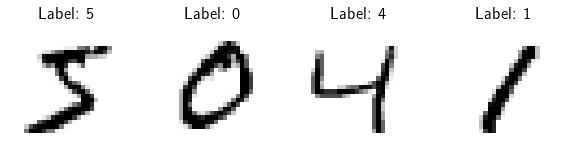

In [266]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, train_images, train_labels):
    ax.set_axis_off()
    image = image.reshape(28, 28)  # 1D 784 pixels to 2D 28*28 pixels for plotting
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")

Preprocess the data:

In [267]:
def preprocess_data(data):
    data_reshaped = data.reshape((
        data.shape[0], data.shape[1] * data.shape[2]
    ))
    data_reshaped_normalised = data_reshaped.astype("float32") / 255
    return data_reshaped_normalised

In [268]:
train_images = preprocess_data(train_images)
test_images = preprocess_data(test_images)

Create the model:

In [287]:
# Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [284]:
# # Functional API
# inputs = tf.keras.Input(shape=train_images[0].shape)
# features = tf.keras.layers.Dense(512, activation="relu")(inputs)
# outputs = tf.keras.layers.Dense(10, activation="softmax")(features)
# model = tf.keras.Model(inputs=inputs, outputs=outputs)

Compile the model:

In [274]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

Fit the model to the training data:

In [275]:
model.fit(
    train_images, train_labels, epochs=1, batch_size=128, verbose=False
);

Use the model for predictions with [`model.predict()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict) (i.e., inference).

In [276]:
y_pred = model.predict(test_images)

Each prediction has a probability per category:

In [277]:
y_pred[0]

array([8.2753053e-05, 4.0025995e-07, 4.9367757e-04, 1.4054375e-03,
       1.9608792e-06, 1.9469218e-05, 1.1730392e-08, 9.9768424e-01,
       2.5350811e-05, 2.8667491e-04], dtype=float32)

The most likely category can be found by finding the maximum of these (using [`np.argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)):

In [278]:
np.argmax(y_pred[0])

7

So, the model things the first digit is a 7.

Let's plot the first four test digits with their predictions to see:

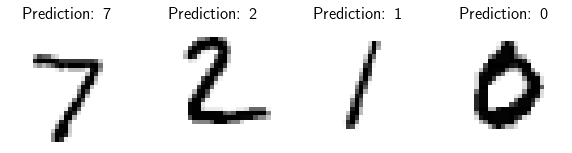

In [279]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, test_images, y_pred):
    ax.set_axis_off()
    image = image.reshape(28, 28)  # 1D 784 pixels to 2D 28*28 pixels for plotting
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {np.argmax(prediction):.0f}")

Nice.

Let's now evaluate the model overall:

In [280]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy (R2): {test_acc}")

313/313 [==============================] - 0s 640us/step - loss: 0.1326 - sparse_categorical_accuracy: 0.9610
Test accuracy (R2): 0.9610000252723694


Similar to scikit-learn an overall accuracy of 96% is very good.

A before, let's have a look at a confusion matrix for this.

_TensorFlow does have its own [`confusion_matrix`](https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix) method. Though I'll use the scikit-learn one here again as it has a nice plot feature._

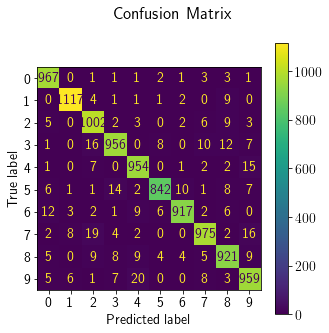

In [281]:
confusion_matrix = metrics.ConfusionMatrixDisplay.from_predictions(
    test_labels, np.argmax(y_pred, axis=1)
)
confusion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

This model did well for most digits, though struggled a bit with 5's.

## Exercises

```{admonition} Exercise 1

...

```

## {ref}`Solutions <fundamentals>`

## Key Points

```{important}

- [x] _..._

```

## Further information

### Good practices

- The choice of algortihm depends on the problem/data (i.e., whether you use linear regression, deep learning, etc.).
    - What assumptions are appropriate?
- Future data should be from the same distribution as the training data (_data drift_).
- The test set should be representative of the future data. For example:
    - For time series, test data may be 2021, while training data was 2015-2020. 
    - For medical application, test data may be completely new patients, not multiple visits from same patients in training data.
- Consider reducing the dimensionality of the data (e.g., using PCA, Principle Component Analysis).
- Have a baseline to compare the model skill against (i.e., simple model, human performance, etc.).
- ...

### Caveats

- Predictions are primarily based on associations, not explanations or causation.
- Predictions and models are specific to the data they were trained on.

### Other options

There are many other excellent options, including:

...

### Resources

**Bold** are highly-recommended.

- **[Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/), Aurélien Géron, 2019, O’Reilly Media, Inc.**  
    - **[Jupyter notebooks](https://github.com/ageron/handson-ml2).**  
- [Deep Learning with Python, 2nd Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff), François Chollet, 2021, Manning.  
    - [Jupyter notebooks](https://github.com/fchollet/deep-learning-with-python-notebooks).  
- [Artificial Intelligence: A Modern Approach, 4th edition](http://aima.cs.berkeley.edu/), Stuart Russell and Peter Norvig, 2021, Pearson.  
- [Machine Learning Yearning](https://www.deeplearning.ai/programs/), Andrew Ng.  

(online_courses)=
### Online courses

**Bold** are highly-recommended.

#### Machine learning

- **[Machine learning](https://www.coursera.org/learn/machine-learning), Coursera, Andrew Ng.**
    - **CS229, Stanford University: [Video lectures](https://www.youtube.com/playlist?list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU).**  
- **[Machine Learning for Intelligent Systems](http://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/), Kilian Weinberger, 2018.**  
    - **CS4780, Cornell: [Video lectures](https://youtube.com/playlist?list=PLl8OlHZGYOQ7bkVbuRthEsaLr7bONzbXS).**  
- [Artificial Intelligence: Principles and Techniques](https://www.youtube.com/playlist?list=PLoROMvodv4rO1NB9TD4iUZ3qghGEGtqNX), Percy Liang and Dorsa Sadigh, CS221, Standord, 2019.  
- [Machine learning in Python with scikit-learn](https://www.fun-mooc.fr/en/courses/machine-learning-python-scikit-learn/), scikit-learn developers, 2022.
  - [Course materials](https://inria.github.io/scikit-learn-mooc/)
  - [Jupyter Notebooks](https://github.com/INRIA/scikit-learn-mooc/) 


#### Deep learning

- **[Deep Learning Specialization](https://www.coursera.org/specializations/deep-learning), Coursera, DeepLearning.AI (_NumPy, Keras, TensorFlow_)**
    - **CS230, Stanford University: [Video lectures](https://www.youtube.com/playlist?list=PLoROMvodv4rOABXSygHTsbvUz4G_YQhOb), [Syllabus](http://cs230.stanford.edu/syllabus/)**
- [NYU Deep Learning](https://atcold.github.io/NYU-DLSP21/), Yann LeCun and Alfredo Canziani, NYU, 2021 (_PyTorch_)
    - [Video lectures](https://www.youtube.com/playlist?list=PLLHTzKZzVU9e6xUfG10TkTWApKSZCzuBI)  